In [1]:
import numpy as np
import pandas as pd
from groq import Groq
import os
import time

In [2]:
response = pd.read_excel('../../dataframes/llama3-70B-OMIEC200824_0.3_temp_NEUROMORPHIC_RESPONSES_v2.xlsx')
raw_data =  pd.read_excel('../../data/raw/OMIEC_NEUROMORPHIC_20_08_24_v2.xlsx')

In [3]:
from IPython.display import display, Markdown

display(Markdown(raw_data['Abstract'][98]))

Organic electrochemical transistors (OECTs) have been widely researched for the next-generation electronic building blocks because of their unique property that combines highly efficient signal transduction with amplification in a single device. By virtue of materials engineering and interfacial modification, multifunctional OECTs have been reported for biological sensing, physiological signal recording, and neuromorphic processing applications. With these significant advancements, it is beneficial to reveal universal device engineering guidelines such that OECTs can be readily tailored to satisfy the specific needs of each application. In this perspective, we systematically discuss the key physical processes that influence OECT operation, which includes both steady state and transient responses. These discussions reveal the important role of fine-tuning the OECT active materials, interfacial properties, and device structures to manipulate their charge transport properties for multifunctional applications. Finally, we also share our perspectives on a few hurdles as the community moves to transform OECTs from laboratory ideas into real-world technologies.

In [4]:
result = pd.concat([response, raw_data], axis=1)
result.drop('index', axis=1, inplace=True)

In [5]:
def prepare_corpus(df):
    corpus = []
    for index, row in df.iterrows():
        for token in set(str(row['response']).replace('\n', ';').split(';')):
            corpus.append(token.strip().replace('/', "-").replace(":", "-"))
            
    return pd.Series(corpus)

In [6]:
corpus = prepare_corpus(result)
corpus = corpus[corpus != 'nan']
corpus = corpus[corpus != '']
corpus = corpus.reset_index(drop=True)

In [7]:
len(corpus)

73

In [8]:
len(np.unique(corpus))

44

In [9]:
np.unique(corpus[corpus.str.contains(r'PEDOT', regex=True)].values.tolist())

array(['PEDOT', 'PEDOT-Nafion', 'PEDOT-PSS'], dtype='<U12')

In [10]:
"""replacements = {
    r'.*\s\(([^)]+)\)$': r'\1', # para polímeros que estão no formato 'nome_polímero (abreviação_polímero)', substitui pela abreviação apenas
    r'[Pp]oly\(3,4-ethylenedioxythiophene\)': 'PEDOT',
    r'\b[Pp]EDOT[-\s]?[Pp]oly\(?[0-9]*[-\s]*styrenesulfonate\)?\b': 'PEDOT-PSS',
    r'\b[Pp]EDOT\s*[-\s]*PSS\)?': 'PEDOT-PSS',
    r'\bPEDOT-PSS\)$': 'PEDOT-PSS',
    r'[Pp]olypyrrole': 'PPy',
    r'[Pp]olyethylenedioxythiophene': 'PEDOT',
    r'[Pp]olythiophene[s]?': 'PT',  
    r'[Pp]oly\((thiophene)\)': 'PT',
    r'[Pp]oly\(3-methylthiophene\)': 'P3MT',
    r'[Pp]oly\(3-hexylthiophene\)': 'P3HT',
    r'[Pp]oly\(3-hexylthiophene[-\d,]*diyl\)': 'P3HT'

}"""

replacements = {
    r"(?i)PEDOT-TOS": 'PEDOT-TOS',
     r"(?i)PEDOT-\s*PSS": 'PEDOT-PSS'
}

items_to_remove = [r'(?i)\bmixed\b',
                   r'(?i)\bnone\b',
                   r'MIEC.*',
                   'based', 
                   r'[Pp]olymer',
                   r'OECT.*',
                   'conjug'
                   ]


In [11]:
for pattern, replacement in replacements.items():
    corpus = corpus.str.replace(pattern, replacement, regex=True, case=False)
    
for item in items_to_remove:
    corpus = corpus[~corpus.str.contains(item, regex=True)]

In [12]:
len(corpus)

72

In [13]:
len(corpus.unique())

43

In [14]:
corpus.value_counts().head(50)

PEDOT-PSS                                     20
P3HT                                           7
p(g2T-T)                                       2
PT                                             2
p(g2T-TT)                                      2
BBL                                            2
PNDI2TEG-2Tz                                   1
ETE-COONa                                      1
CHIT                                           1
rr-P3HT                                        1
PPy                                            1
CDT-BT                                         1
PEDOT                                          1
NDI                                            1
Homo-gDPP                                      1
PNDI2OD-2Tz                                    1
PCPDTBT-SO3K                                   1
P(gPzDPP-CT2)                                  1
DPP-g2T                                        1
Nafion                                         1
CPE-K               

C:\Users\gustavo220061\AppData\Local\Temp\ipykernel_1740\2760201650.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_counts.values, y=top_10_counts.index, palette="viridis")


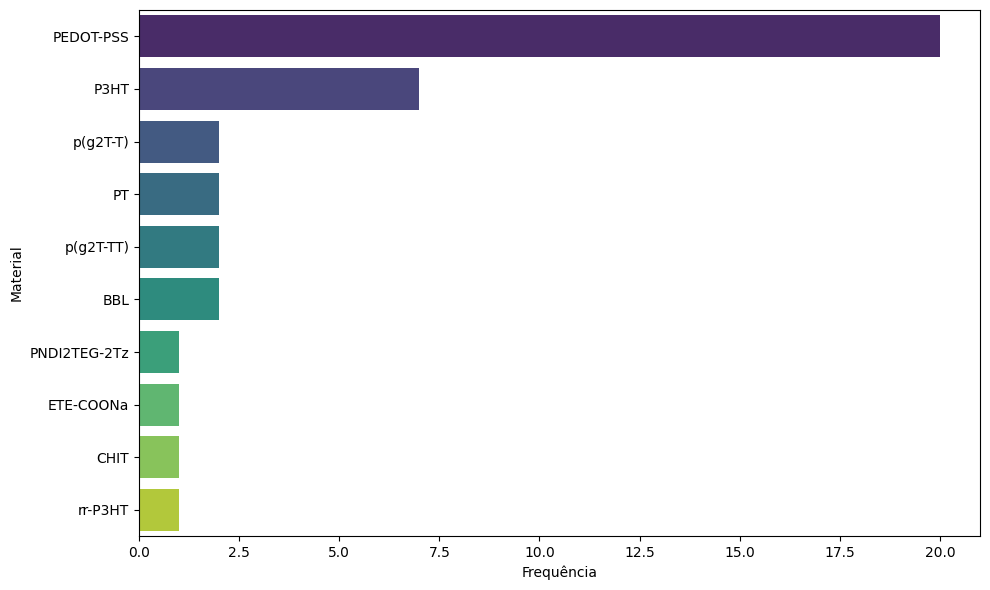

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

top_10_counts = corpus.value_counts().head(10)

# Ajustando o tamanho da figura
plt.figure(figsize=(10, 6))

# Plotando o histograma
sns.barplot(x=top_10_counts.values, y=top_10_counts.index, palette="viridis")
plt.xlabel('Frequência')
plt.ylabel('Material')

# Ajustando layout para não cortar legendas
plt.tight_layout()

# Salvando a imagem
#plt.savefig('gráficos/llama3-70B-OMIEC160824_RESPONSES_ranking.png')

# Exibindo a imagem
plt.show()


Tendência de publicações sobre a temática durante os anos

C:\Users\gustavo220061\AppData\Local\Temp\ipykernel_1740\3642470878.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


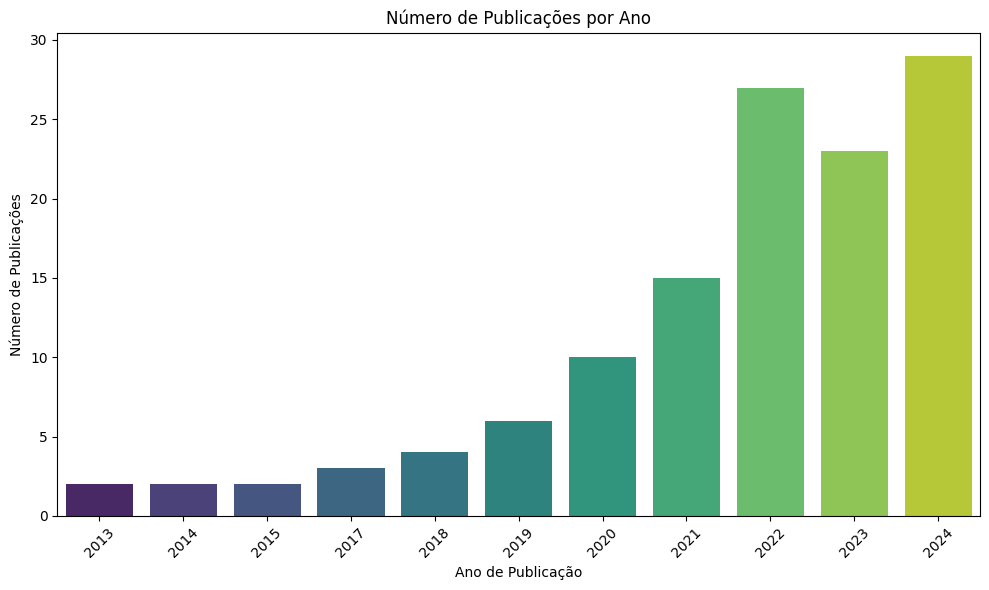

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Supondo que 'raw_data' seja o seu DataFrame e 'Publication Year' seja a coluna com os anos de publicação
publication_counts = raw_data['Publication Year'].value_counts()

# Ordenar os valores pela data para melhorar a visualização (opcional)
publication_counts = publication_counts.sort_index()

# Criar o gráfico de barras com Seaborn usando a paleta "viridis"
plt.figure(figsize=(10, 6))
sns.barplot(
    x=publication_counts.index, 
    y=publication_counts.values, 
    palette="viridis"  # Aplica a paleta de cores "viridis"
)

# Configurar o título e os rótulos dos eixos
plt.title('Número de Publicações por Ano')
plt.xlabel('Ano de Publicação')
plt.ylabel('Número de Publicações')

# Mostrar o gráfico
plt.xticks(rotation=45)  # Rotaciona os rótulos do eixo x para melhor visualização

# Ajustando layout para não cortar legendas
plt.tight_layout()

# Salvando a imagem
plt.savefig('images/llama3-70B-OMIEC200824_NEUROMORPHIC_publicação_por_ano.png')

plt.show()


Localizando os artigos em que aparecem os polímeros

In [17]:
result

,response,Publication Type,Authors,Book Authors,Book Editors,Book Group Authors,Author Full Names,Book Author Full Names,Group Authors,Article Title,...,Web of Science Index,Research Areas,IDS Number,Pubmed Id,Open Access Designations,Highly Cited Status,Hot Paper Status,Date of Export,UT (Unique WOS ID),Web of Science Record
0,PT; NDI,J,"Griggs, S; Marks, A; Meli, D; Rebetez, G; Bard...",NaN,NaN,NaN,"Griggs, Sophie; Marks, Adam; Meli, Dilara; Reb...",NaN,NaN,The effect of residual palladium on the perfor...,...,Science Citation Index Expanded (SCI-EXPANDED),Science & Technology - Other Topics,9C7HY,36575179.0,"gold, Green Published",NaN,NaN,2024-08-20,WOS:000935585400011,View Full Record in Web of Science
1,PEDOT:PSS; Mel,J,"Nozella, NL; Lima, JVM; de Oliveira, RF; Graef...",NaN,NaN,NaN,"Nozella, Natan Luis; Lima, Joao Victor Morais;...",NaN,NaN,Melanin/PEDOT:PSS blend as organic mixed ionic...,...,Emerging Sources Citation Index (ESCI),Materials Science,T8ME8,NaN,gold,NaN,NaN,2024-08-20,WOS:001066878900001,View Full Record in Web of Science
2,P3MEEET,J,"Collins, GW; Lone, MS; Jackson, SR; Keller, JN...",NaN,NaN,NaN,"Collins, Garrett W.; Lone, Mohd Sajid; Jackson...",NaN,NaN,Photoluminescence Probes Ion Insertion into Am...,...,Science Citation Index Expanded (SCI-EXPANDED),Chemistry; Science & Technology - Other Topics...,RS6V7,NaN,hybrid,NaN,NaN,2024-08-20,WOS:001229699000001,View Full Record in Web of Science
3,NaN,J,"Kim, H; Won, Y; Song, HW; Kwon, Y; Jun, M; Oh, JH",NaN,NaN,NaN,"Kim, Hyunwook; Won, Yousang; Song, Hyun Woo; K...",NaN,NaN,Organic Mixed Ionic-Electronic Conductors for ...,...,Science Citation Index Expanded (SCI-EXPANDED),Chemistry; Science & Technology - Other Topics...,ZI0I9,38148583.0,"gold, Green Accepted",NaN,NaN,2024-08-20,WOS:001131799400001,View Full Record in Web of Science
4,NaN,J,"Quill, TJ; LeCroy, G; Marks, A; Hesse, SA; Thi...",NaN,NaN,NaN,"Quill, Tyler J.; LeCroy, Garrett; Marks, Adam;...",NaN,NaN,Charge Carrier Induced Structural Ordering And...,...,Science Citation Index Expanded (SCI-EXPANDED),Chemistry; Science & Technology - Other Topics...,FJ7I0,38198654.0,NaN,NaN,NaN,2024-08-20,WOS:001145462600001,View Full Record in Web of Science
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,NaN,J,"Doris, SE; Pierre, A; Street, RA",NaN,NaN,NaN,"Doris, Sean E.; Pierre, Adrien; Street, Robert A.",NaN,NaN,Dynamic and Tunable Threshold Voltage in Organ...,...,Science Citation Index Expanded (SCI-EXPANDED),Chemistry; Science & Technology - Other Topics...,GC9EV,29498110.0,NaN,NaN,NaN,2024-08-20,WOS:000430101200030,View Full Record in Web of Science
119,NaN,J,"Rivnay, J; Inal, S; Salleo, A; Owens, RM; Berg...",NaN,NaN,NaN,"Rivnay, Jonathan; Inal, Sahika; Salleo, Albert...",NaN,NaN,Organic electrochemical transistors,...,Science Citation Index Expanded (SCI-EXPANDED),Science & Technology - Other Topics; Materials...,FY1WS,NaN,Green Submitted,NaN,NaN,2024-08-20,WOS:000426604800007,View Full Record in Web of Science
120,P(VDF-TrFE); P3HT,J,"Kong, LA; Sun, J; Qian, C; Fu, Y; Wang, JX; Ya...",NaN,NaN,NaN,"Kong, Ling -an; Sun, Jia; Qian, Chuan; Fu, Yin...",NaN,NaN,Long-term synaptic plasticity simulated in ion...,...,Science Citation Index Expanded (SCI-EXPANDED),Materials Science; Physics,EY4YX,NaN,NaN,NaN,NaN,2024-08-20,WOS:000403985300017,View Full Record in Web of Science
121,P3HT,J,"Qian, C; Kong, LA; Yang, JL; Gao, YL; Sun, J",NaN,NaN,NaN,"Qian, Chuan; Kong, Ling-an; Yang, Junliang; Ga...",NaN,NaN,Multi-gate organic neuron transistors for spat...,...,Science Citation Index Expanded (SCI-EXPANDED),Physics,EL6WH,NaN,NaN,NaN,NaN,2024-08-20,WOS:000394762600040,View Full Record in Web of Science


In [18]:
polímeros_encontrados = pd.DataFrame(columns=['Nome'] + result.columns.tolist())

for index, row in result.iterrows():
    for token in set(str(row['response']).replace('\n', ';').split(';')):
            polimero = token.strip().replace('/', "-").replace(":", "-")
            new_row = row.to_dict() 
            new_row['Nome'] = polimero
            new_row_df = pd.DataFrame([new_row])
            polímeros_encontrados = pd.concat([new_row_df, polímeros_encontrados], ignore_index=True)

C:\Users\gustavo220061\AppData\Local\Temp\ipykernel_1740\4170896890.py:9: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  polímeros_encontrados = pd.concat([new_row_df, polímeros_encontrados], ignore_index=True)


In [19]:
for pattern, replacement in replacements.items():
    polímeros_encontrados['Nome'] = polímeros_encontrados['Nome'].str.replace(pattern, replacement, regex=True, case=False)

In [20]:
for index, row in polímeros_encontrados[polímeros_encontrados['Nome'] == 'PEO'].iterrows():
    print(row['Nome'],"| Citações:", row['Times Cited, All Databases'] , '\n', row['Abstract'], '\n')

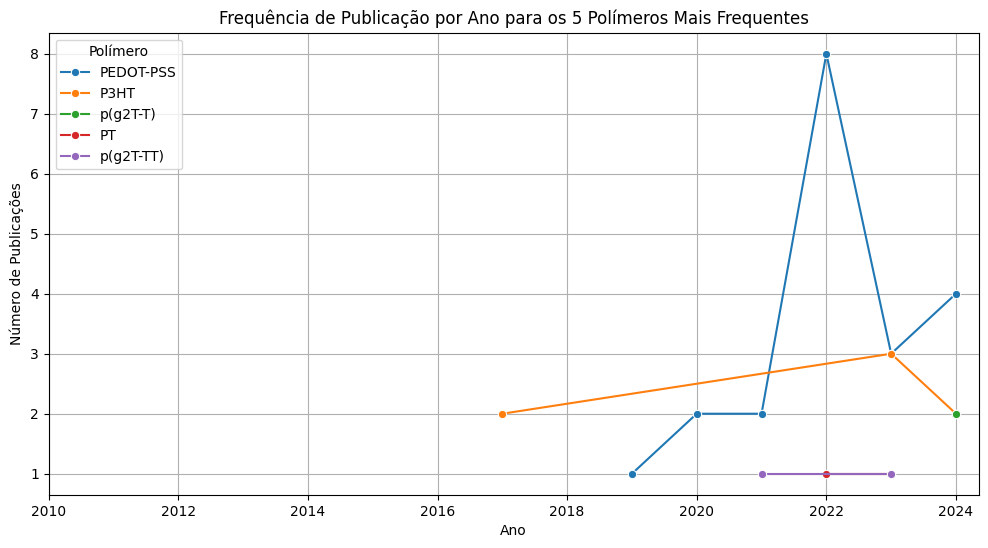

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

dfs = []


for polymer in corpus.value_counts().head(5).index:
    publication_counts = polímeros_encontrados[polímeros_encontrados['Nome'] == polymer]['Publication Year'].value_counts()
    publication_counts = publication_counts.sort_index().reset_index()
    publication_counts.columns = ['Year', 'Count']
    publication_counts['Polymer'] = polymer
    dfs.append(publication_counts)


combined_df = pd.concat(dfs)

plt.figure(figsize=(12, 6))
sns.lineplot(data=combined_df, x='Year', y='Count', hue='Polymer', marker='o')
plt.title('Frequência de Publicação por Ano para os 5 Polímeros Mais Frequentes')
plt.xlabel('Ano')
plt.ylabel('Número de Publicações')
plt.legend(title='Polímero')
plt.grid(True)

plt.xlim(left=2010)

plt.savefig('images/llama3-70B-OMIEC190824_NEUROMORPHIC_freq_publicação_polimero.png')

plt.show()


### Playground

Tendência de publicações por ano plotado com plotly

In [22]:
import plotly.express as px

# Supondo que 'raw_data' seja o seu DataFrame e 'Publication Year' seja a coluna com os anos de publicação
publication_counts = raw_data['Publication Year'].value_counts()

# Ordenar os valores pela data para melhorar a visualização (opcional)
publication_counts = publication_counts.sort_index()

# Criar o gráfico de barras com Plotly
fig = px.bar(
    x=publication_counts.index, 
    y=publication_counts.values, 
    labels={'x': 'Publication Year', 'y': 'Number of Publications'},
    title='Number of Publications per Year',
    color=publication_counts.index,  # Adiciona cor baseado no índice (ano de publicação)
    color_continuous_scale='viridis'  # Aplica a paleta "viridis"
)

# Configurar o layout
fig.update_layout(
    xaxis=dict(tickangle=45),  # Rotaciona os rótulos do eixo x para melhor visualização
    yaxis_title='Number of Publications',
    xaxis_title='Publication Year',
    coloraxis_showscale=False  # Oculta a barra de escala de cores, se indesejado
)

# Mostrar o gráfico
fig.show()


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed